In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print(x_train.shape)
print(x_train.ndim)
print(x_train.dtype)

(60000, 28, 28)
3
uint8


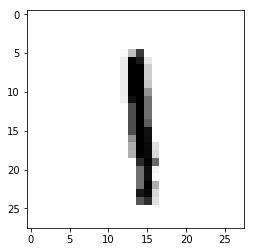

In [5]:
plt.imshow(x_train[8], cmap=plt.cm.binary)

In [6]:
print(y_train[8])

1


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /=255

In [8]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
from keras.utils import to_categorical

In [11]:
print(y_train[0])
print(y_test[0])
print(y_train.shape)
print(x_train.shape)

5
7
(60000,)
(60000, 784)


In [12]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [13]:
print(y_train[0])
print(y_test[0])
print(y_train.shape)
print(y_test.shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(60000, 10)
(10000, 10)


In [14]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [18]:
model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 1s 15us/step - loss: 1.5821 - acc: 0.5370
Epoch 2/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.7537 - acc: 0.8091
Epoch 3/5
60000/60000 [==============================] - 1s 11us/step - loss: 0.5252 - acc: 0.8585
Epoch 4/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.4465 - acc: 0.8777
Epoch 5/5
60000/60000 [==============================] - 1s 10us/step - loss: 0.4065 - acc: 0.8861


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 11us/step


In [20]:
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

Test accuracy: 0.8952
Test loss: 0.37443064841032025


In [21]:
predictions = model.predict(x_test)
x_test.shape

(10000, 784)

In [24]:
print(predictions[43])
np.argmax(predictions[43])

[5.8411788e-03 4.7978263e-02 7.8068703e-01 5.0096322e-02 2.6339707e-03
 5.0679492e-03 2.3936775e-02 5.1807082e-04 8.1863709e-02 1.3767466e-03]


2

ix:  7689


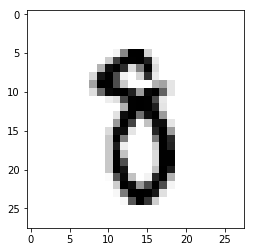

In [54]:
import random

x_test_reshaped = x_test.reshape(10000, 28,28)
ix = random.randint(0, len(x_test_reshaped))
print("ix: ", ix)
plt.imshow(x_test_reshaped[ix], cmap=plt.cm.binary)